In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/parit/Downloads/tips.csv")

In [3]:
data.shape

(244, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_bill   244 non-null    float64
 1   tip          244 non-null    float64
 2   sex          244 non-null    object 
 3   smoker       244 non-null    object 
 4   day          244 non-null    object 
 5   time         244 non-null    object 
 6   size         244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.975082,2.561475
std,8.902412,1.353094,0.942979
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.855000,2.000000
75%,24.127500,3.520000,3.000000
max,50.810000,10.000000,6.000000


In [6]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Create a multiple linear regression model to predict tip based on total_bill and size.

### EDA

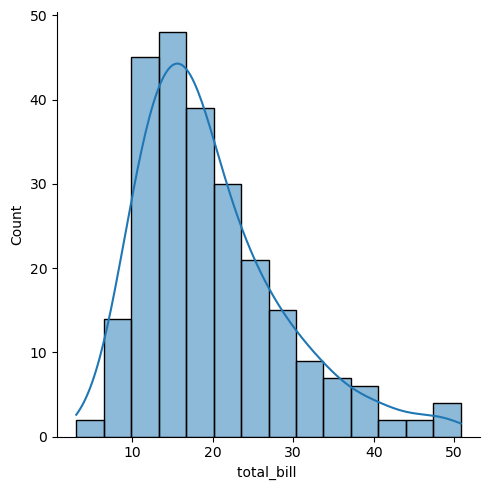

In [12]:
sns.displot(x=data["total_bill "],data=data,kde=True)

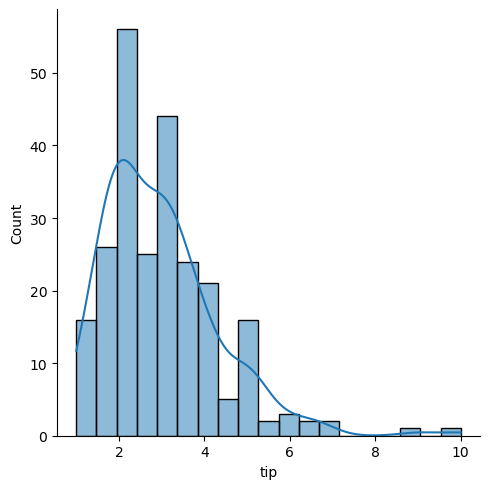

In [10]:
sns.displot(x=data.tip,data=data,kde=True)

<Axes: xlabel='total_bill ', ylabel='tip'>

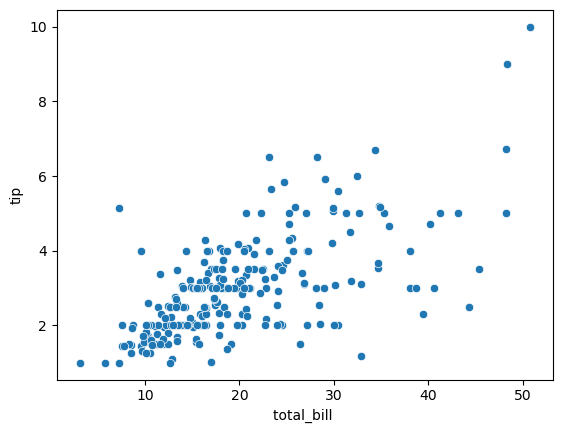

In [13]:
sns.scatterplot(x=data["total_bill "],y=data.tip,data=data)

### checking null values

In [15]:
data.isnull().sum()

total_bill     0
tip            0
sex            0
smoker         0
day            0
time           0
size           0
dtype: int64

### coorelation

C:\Users\parit\AppData\Local\Temp\ipykernel_13676\3284826886.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),vmin=-1,annot=True)


<Axes: >

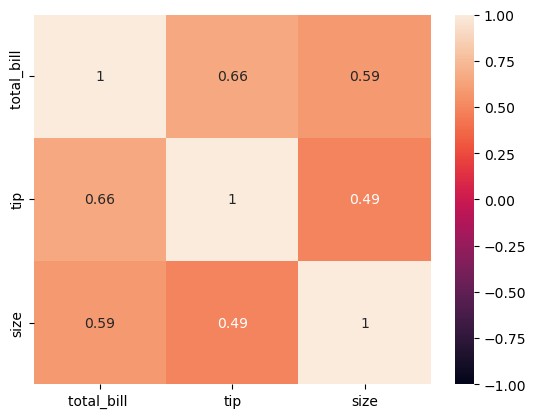

In [16]:
sns.heatmap(data.corr(),vmin=-1,annot=True)

### Multiple linear regression

In [21]:
x=data[["total_bill ","size"]]
y=data["tip"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lin=LinearRegression()

In [26]:
model=lin.fit(x_train,y_train)
print("training completed")

training completed


In [29]:
pred=model.predict(x_test)
pred

array([3.15393084, 1.94206634, 3.84087752, 3.95217339, 2.29339583,
       2.69954269, 3.57579   , 2.25020639, 2.44123661, 2.49107058,
       2.73276534, 2.10817958, 2.09821278, 2.41631963, 1.75595107,
       3.05592403, 3.061738  , 3.00602161, 2.57994116, 5.51702851,
       3.52027898, 3.22286783, 2.4022    , 2.0068505 , 3.24363199,
       2.18459166, 2.06665127, 3.31333109, 3.17144118, 6.39085258,
       4.66971411, 1.85651803, 2.98698704, 2.89887857, 2.91721948,
       3.80184091, 2.21283091, 5.38240834, 2.30668489, 3.09655332,
       2.08658486, 2.41964189, 3.20286579, 2.36572354, 2.07246523,
       1.17455474, 2.09322939, 3.06007686, 1.84156783])

In [27]:
print("training score of machine learning model =",model.score(x_train,y_train))

training score of machine learning model = 0.424586939337967


In [28]:
from sklearn.metrics import r2_score

In [30]:
print("testing score of M.L model=",r2_score(y_test,pred))

testing score of M.L model= 0.4975913676683167


#### r2_score < 0.5 weak model 

In [33]:
x_test["actual"]=y_test
x_test["predicted"]=pred
x_test.head(10)

,total_bill,size,actual,predicted
24,19.82,3,3.18,3.153931
6,8.77,2,2.00,1.942066
153,24.55,4,2.00,3.840878
211,25.89,4,5.16,3.952173
198,13.00,2,2.00,2.293396
176,17.89,2,2.00,2.699543
192,28.44,2,2.56,3.575790
124,12.48,2,2.52,2.250206
9,14.78,2,3.23,2.441237
101,15.38,2,3.00,2.491071


### predicting tip from new data

In [34]:
total_bill=[20,21,23]
size=[3,2,4]
raw_data=pd.DataFrame({"total_bill ":total_bill,"size":size})
raw_data

,total_bill,size
0,20,3
1,21,2
2,23,4


In [35]:
model.predict(raw_data)

array([3.16888103, 2.95784877, 3.71213976])